<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
---
ВАРИАНТ РАБОТЫ имеет вид: ZPN, где

Z=1-6 – вид закона распределения генерируемых признаков

1.     Биномиальное

2.     Геометрическое

3.     Гипергеометрическое

4.     Пуассона

5.     Равномерное

6.     Нормальное

P=2,3 – число признаков

N=3,4,5 – число классов

ПОРЯДОК ВЫПОЛНЕНИЯ РАБОТЫ

1.     Сгенерировать случайные числа по указанному закону распределения. Из них создается матрица из M строк (наблюдений) и P столбцов (признаков). Сгенерированные строки должны принадлежать одному из N классов за счет прибавления к сгенерированным числам положительной или отрицательной добавки (функция)
2.     Все признаки   должны быть числовыми и нормализованными (находиться в диапазоне [0,1]). Дополнительно создается классификационный признак.

3.     Разделить данные варианта на  обучающую и тестирующую выборки.

4.     Персептрон. Так как персептрон способен делить объекты только на два класса, то организуем работу итерационно:

        4.1.  Создать персептрон для отделения 1 класса от всех остальных. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 1 класса.

        4.2.  Создать персептрон для отделения 2 класса от оставшихся. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 2 класса

        4.3.  Продолжить, пока не будут разделены все объекты

        4.4.  Построить графики разделяющей поверхности и визуальное представление результатов тестирования

5.     Сеть Кохонена (Kohonen). Вероятностная нейронная сеть (PNN).  Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Осуществить кластеризацию с помощью конкурирующей сети (слой Кохонена), а затем классификацию с помощью двух трехслойных сетей: вероятностной нейронной сети (PNN) и сети с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Для каждого вида сети выполнить следующие этапы:

     5.1 Создание сети

     5.2 Обучение сети на обучающей выборке

     5.3 Протестировать сеть отдельно по обучающей и по тестирующей выборке

     5.4 Построить визуальное представление результатов тестирования

     5.5 Оценить качество классификации в виде матриц

     5.6 Выдать число итераций обучения

6.     Оформить результаты в виде таблицы


In [142]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [143]:
import numpy as np

# Указываем параметры
Z = 1  # Выбираем гипергеометричское распределение
P = 2  # Число признаков
N = 5  # Число классов

count = 10
M = 100  # Число наблюдений
data = []
for i in range(N):

    ngood = np.random.randint(70, 100)
    nbad = 100 - ngood
    nsample = np.random.randint(1, 100)

    c = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=nsample, size=(M, P)) + count
    count += 1

    data.append(c)

# Собираем признаки из всех классов
x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y

xy = [[x[i], y[i]] for i in range(len(x))]

# Создаем список Y, присваивая каждому классу уникальное значение
# Y будет представлять классификационный признак,
# который указывает на принадлежность каждой точки данных к одному из 5 классов.
Y = []
for i in range(N):
    Y.extend([i] * M)

# Преобразуем список Y в массив numpy
Y = np.array(Y)

# Выводим данные и метки классов
print(xy)
print(Y)


[[63, 62], [65, 67], [61, 62], [61, 63], [64, 64], [64, 62], [62, 63], [63, 64], [66, 62], [63, 59], [63, 58], [61, 64], [61, 61], [66, 60], [65, 62], [61, 64], [65, 62], [64, 62], [63, 63], [65, 62], [60, 63], [62, 62], [65, 61], [66, 62], [63, 63], [63, 60], [63, 66], [63, 64], [63, 62], [61, 62], [61, 61], [63, 66], [63, 66], [63, 69], [61, 64], [61, 65], [62, 65], [67, 60], [64, 64], [64, 64], [64, 63], [63, 62], [66, 63], [63, 62], [62, 65], [65, 64], [63, 62], [62, 65], [64, 63], [63, 63], [62, 66], [62, 61], [66, 63], [63, 62], [60, 64], [67, 62], [63, 64], [63, 62], [61, 62], [62, 64], [63, 60], [62, 67], [64, 62], [67, 64], [63, 62], [61, 63], [62, 64], [63, 61], [64, 64], [64, 61], [63, 62], [64, 64], [63, 63], [63, 62], [62, 65], [63, 63], [63, 60], [63, 61], [66, 63], [66, 65], [62, 65], [64, 64], [66, 64], [63, 61], [61, 62], [60, 63], [61, 62], [62, 63], [62, 66], [65, 64], [62, 62], [62, 63], [63, 63], [65, 63], [65, 60], [61, 63], [61, 61], [62, 63], [62, 62], [61, 63],

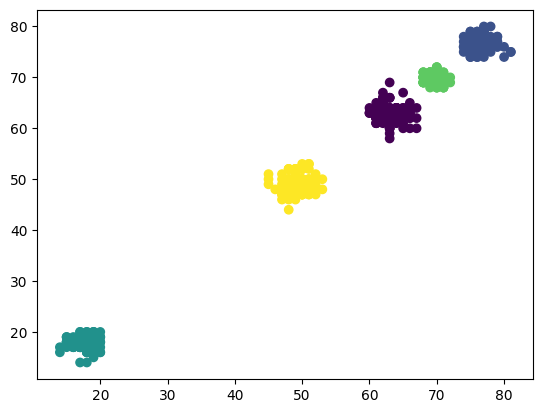

In [144]:
# Создаем DataFrame
res_df = pd.DataFrame(xy)
# Создаем двумерный рассеянный график
plt.scatter(x, y, c=Y)
# Показываем график
plt.show()

In [145]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import hypergeom

# def genGeo():
#     ngood1 = 50
#     nbad1 = 50
#     nsample1 = 20

#     ngood2 = 40
#     nbad2 = 60
#     nsample2 = 20

#     g1 = hypergeom.rvs(ngood1 + nbad1, ngood1, nsample1, size=(400, 1)) + 40
#     g2 = hypergeom.rvs(ngood2 + nbad2, ngood2, nsample2, size=(400, 1)) + 30
#     g3 = hypergeom.rvs(ngood2 + nbad2, ngood2, nsample2, size=(400, 1)) + 20
#     g4 = hypergeom.rvs(ngood2 + nbad2, ngood2, nsample2, size=(400, 1)) + 10
#     g5 = hypergeom.rvs(ngood2 + nbad2, ngood2, nsample2, size=(400, 1))
#     g = np.r_[g1[:, :], g2[:, :] , g3[:, :], g4[:, :], g5[:, :]]
#     return g


# data = genGeo()

# # Разделяем данные на два массива признаков x и y
# x = data[:, 0]
# y = data[:, 1]

# # Создаем список Y, присваивая каждому классу уникальное значение
# # Y будет представлять классификационный признак,
# # который указывает на принадлежность каждой точки данных к одному из 5 классов.
# N = 5  # Количество классов
# M = len(x) // N  # Количество точек данных в каждом классе

# Y = np.array([i for i in range(N) for _ in range(M)])  # Создаем список Y

# # Теперь у вас есть массивы x, y и Y, которые вы можете использовать далее.


# # res_df = pd.DataFrame(data, columns=['Значения'])

# # plt.scatter(res_df.index, res_df['Значения'], alpha=0.5)
# # plt.xlabel('Индекс')
# # plt.ylabel('Значения')
# # plt.title('Рассеянная диаграмма сгенерированных данных')
# # plt.grid(True)

# # plt.show()

In [146]:
# # Собираем признаки из всех классов
# x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
# y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y

# xy = [[x[i], y[i]] for i in range(len(x))]


In [147]:
# Y = []
# for i in range(5):
#     Y.extend([i] * 400)

# # Преобразуем список Y в массив numpy
# Y = np.array(Y)
# print(Y)

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1))
scaler.fit(res_df)
standart_df = scaler.transform(res_df)
print(type(standart_df))
print(standart_df)

<class 'numpy.ndarray'>
[[0.73134328 0.72727273]
 [0.76119403 0.8030303 ]
 [0.70149254 0.72727273]
 [0.70149254 0.74242424]
 [0.74626866 0.75757576]
 [0.74626866 0.72727273]
 [0.71641791 0.74242424]
 [0.73134328 0.75757576]
 [0.7761194  0.72727273]
 [0.73134328 0.68181818]
 [0.73134328 0.66666667]
 [0.70149254 0.75757576]
 [0.70149254 0.71212121]
 [0.7761194  0.6969697 ]
 [0.76119403 0.72727273]
 [0.70149254 0.75757576]
 [0.76119403 0.72727273]
 [0.74626866 0.72727273]
 [0.73134328 0.74242424]
 [0.76119403 0.72727273]
 [0.68656716 0.74242424]
 [0.71641791 0.72727273]
 [0.76119403 0.71212121]
 [0.7761194  0.72727273]
 [0.73134328 0.74242424]
 [0.73134328 0.6969697 ]
 [0.73134328 0.78787879]
 [0.73134328 0.75757576]
 [0.73134328 0.72727273]
 [0.70149254 0.72727273]
 [0.70149254 0.71212121]
 [0.73134328 0.78787879]
 [0.73134328 0.78787879]
 [0.73134328 0.83333333]
 [0.70149254 0.75757576]
 [0.70149254 0.77272727]
 [0.71641791 0.77272727]
 [0.79104478 0.6969697 ]
 [0.74626866 0.75757576]
 

In [149]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами:
# - n_clusters=5 указывает, что мы хотим разделить данные на 5 кластера.
# - random_state=0 используется для установки начального состояния генератора случайных чисел и обеспечения воспроизводимости результатов.
kmeans = KMeans(n_clusters=5,n_init=10, random_state=0)

# Обучаем модель K-Means на стандартизированных данных `standart_df`.
kmeans.fit(standart_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [150]:
# Создаем DataFrame `df_cluster_centers` для хранения координат центров кластеров.
df_cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

# Выводим DataFrame `df_cluster_centers`, который содержит координаты центров кластеров.
print(df_cluster_centers)
print("----------------------------------------------------------------------------------")
print("матрица ошибок")
# Выводим матрицу ошибок, которая показывает, как точки данных распределены по кластерам
# и сравнивает это с истинными метками классов.
# `Y` содержит истинные метки классов, а `kmeans.labels_` содержит предсказанные метки кластеров.
confusion_mat = confusion_matrix(Y, kmeans.labels_)
print(confusion_mat)

          0         1
0  0.936866  0.946061
1  0.057313  0.057727
2  0.524776  0.534242
3  0.732388  0.740909
4  0.829403  0.844848
----------------------------------------------------------------------------------
матрица ошибок
[[  0   0   0 100   0]
 [100   0   0   0   0]
 [  0 100   0   0   0]
 [  0   0   0   0 100]
 [  0   0 100   0   0]]


In [151]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Ваш код для создания объекта KMeans и кластеризации данных

# # Создаем двумерный рассеянный график
# plt.scatter(res_df[0], res_df[1], c=kmeans.labels_)

# # Показываем график точек данных

# # Добавляем точки для центров кластеров внутри кластеров
# for cluster_center in df_cluster_centers:
#     cluster_points = res_df[kmeans.labels_ == cluster_center]
#     center_x, center_y = cluster_points.mean(axis=0)
#     plt.scatter(center_x, center_y, c='red', marker='x')

# # Показываем график
# plt.show()


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standart_df, kmeans.labels_, test_size=0.5, random_state=42)

# X_train - обучающие признаки
# X_test - тестовые признаки
# y_train - метки обучающих данных
# y_test - метки тестовых данных

In [153]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
assert len(X_train) + len(X_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)
assert len(y_train) + len(y_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
# Вывести первые несколько объектов данных (первые 5, например)
print("Первые 5 объектов X_train:")
print(X_train[:5])

print("Первые 5 объектов y_train:")
print(y_train[:5])

print("Первые 5 объектов X_test:")
print(X_test[:5])

print("Первые 5 объектов y_test:")
print(y_test[:5])

Форма X_train: (250, 2)
Форма X_test: (250, 2)
----------------------------------------------------------------------------------
Форма y_train: (250,)
Форма y_test: (250,)
----------------------------------------------------------------------------------
Первые 5 объектов X_train:
[[0.55223881 0.54545455]
 [0.07462687 0.04545455]
 [0.50746269 0.57575758]
 [0.91044776 0.98484848]
 [0.04477612 0.04545455]]
Первые 5 объектов y_train:
[2 1 2 0 1]
Первые 5 объектов X_test:
[[0.82089552 0.84848485]
 [0.73134328 0.72727273]
 [0.85074627 0.83333333]
 [0.94029851 0.93939394]
 [0.94029851 0.93939394]]
Первые 5 объектов y_test:
[4 3 4 0 0]


# Персептрон

In [154]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #    2    np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias # тут ошибка
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    #функция активации
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [155]:
# Создайте экземпляр класса Perceptron
perceptron = Perceptron(learning_rate=0.05, n_iters=5000)

# Обучите персептрон на обучающих данных
perceptron.fit(X_train, y_train)

# Выполните предсказания на трансформированных данных X_test
predictions = perceptron.predict(X_test)

# Определите процент правильно классифицированных объектов
correct_classifications = np.sum(predictions == y_test)
total_objects = len(y_test)
accuracy = correct_classifications / total_objects * 100

print(f"Процент правильно классифицированных объектов: {accuracy}%")


Процент правильно классифицированных объектов: 16.400000000000002%


In [156]:
#отделяем первый класс от других  в обучающей выборке
y_train1 = [[] for _ in range(len(y_train))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_train)):
    if y_train[_] == 0:
        y_train1[_] = 1
    else:
        y_train1[_] = 0
Y_train1 = np.array(y_train1)
Y_train1 = Y_train1.reshape((len(y_train), 1))

#отделяем первый класс от других  в тестирующей выборке
Y_test1 = [[] for _ in range(len(y_test))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_test)):
    if y_test[_] == 0:
        Y_test1[_] = 1
    else:
        Y_test1[_] = 0
y_test1 = np.array(Y_test1)
y_test1 = y_test1.reshape((len(y_test), 1))


dfff = pd.DataFrame(X_train)

In [157]:
print(dfff)

            0         1
0    0.552239  0.545455
1    0.074627  0.045455
2    0.507463  0.575758
3    0.910448  0.984848
4    0.044776  0.045455
..        ...       ...
245  0.940299  0.954545
246  0.059701  0.030303
247  0.820896  0.833333
248  0.522388  0.545455
249  0.940299  0.954545

[250 rows x 2 columns]


In [158]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(
        x=dfff[0], y=dfff[1], mode='markers', marker=dict(size=6, color=y_train1)
    )
])

fig.update_layout(xaxis_title='Feature 0', yaxis_title='Feature 1')
fig.show()


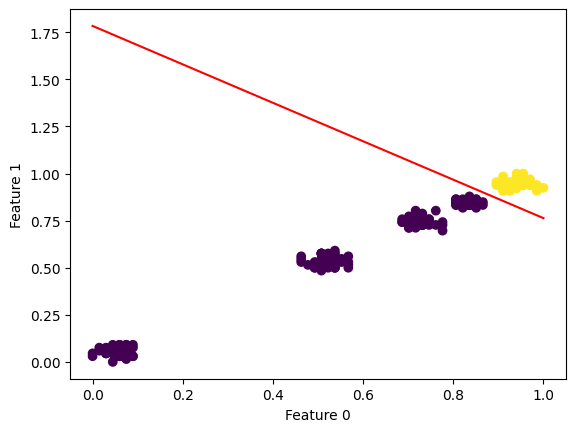

[[201   0]
 [  0  49]]


In [159]:
per = Perceptron(n_iters=1000)

per.fit(X_train, y_train1)
perTrain1 = per.predict(X_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train1, perTrain1)
print(distinctions)


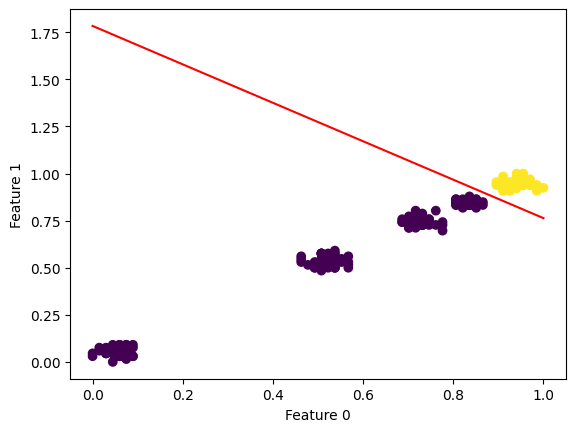

[[199   0]
 [  0  51]]


In [160]:
perTest = per.predict(X_test)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test1, perTest)
print(distinctions)

#убираем 1й класс из обучающей выборки

In [161]:
#убираем 1 класс из обучающей выборки
y_train2 = np.delete(y_train, np.where(y_train == [0]), axis=0)
X_train2 = np.delete(X_train, np.where(y_train == [0]), axis=0)
print(len(y_train2))
print(len(X_train2))
print(y_train2)
for _ in range(len(y_train2)):
    if y_train2[_] == 1:
        y_train2[_] = 1
    else:
        y_train2[_] = 0
print(y_train2)

#убираем 1 класс из тестовой выборки
y_test2 = np.delete(y_test, np.where(y_test == [0]), axis=0)
X_test2 = np.delete(X_test, np.where(y_test == [0]), axis=0)
print(len(y_train2))
print(len(X_train2))

for _ in range(len(y_test2)):
    if y_test2[_] == 1:
        y_test2[_] = 1
    else:
        y_test2[_] = 0

201
201
[2 1 2 1 2 4 2 1 4 3 1 2 3 2 1 1 4 1 4 4 4 1 4 1 2 1 2 1 2 4 1 4 1 4 4 4 2
 2 2 2 1 4 1 1 4 1 2 4 1 2 4 4 2 3 2 3 1 3 1 4 3 3 3 4 4 1 3 3 1 2 4 3 2 2
 1 1 1 2 3 1 2 1 2 1 3 1 1 3 3 3 1 4 1 2 3 2 1 1 1 2 3 2 3 4 2 3 4 3 3 4 2
 2 1 1 2 2 4 1 1 1 1 2 1 2 2 4 4 1 1 3 1 2 4 1 3 4 3 2 2 3 2 3 1 3 1 2 4 3
 4 2 3 4 1 1 3 4 3 4 1 4 2 4 2 4 1 3 4 3 2 2 2 3 3 4 1 1 3 4 2 1 2 4 1 2 4
 1 4 4 3 4 3 2 4 1 2 2 3 3 1 4 2]
[0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
201
201


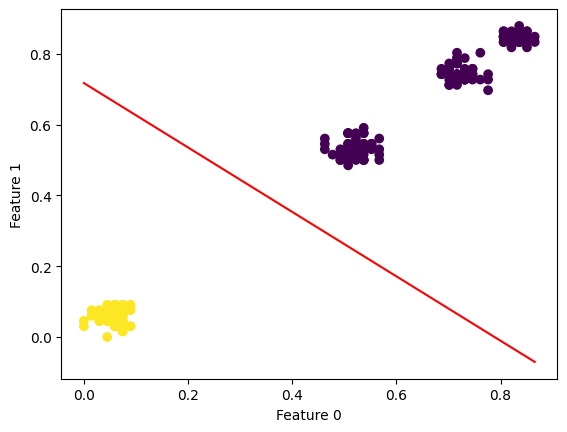

[[142   0]
 [  0  59]]


In [162]:
per2 = Perceptron(n_iters=1000)

per2.fit(X_train2, y_train2)
perTrain2 = per2.predict(X_train2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per2.weights[0] / per2.weights[1]
intercept = -per2.bias / per2.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train2, perTrain2)
print(distinctions)


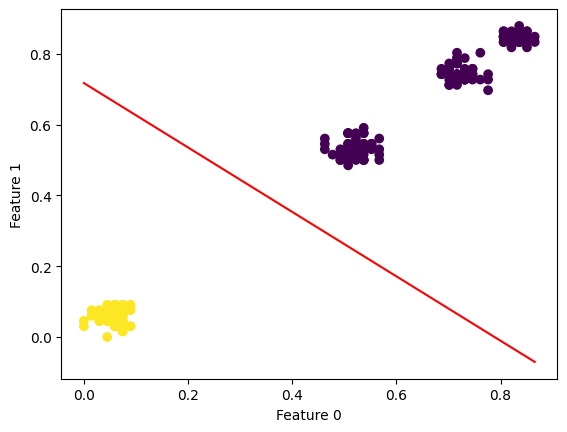

[[158   0]
 [  0  41]]


In [163]:
perTest2 = per2.predict(X_test2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per2.weights[0] / per2.weights[1]
intercept = -per2.bias / per2.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test2, perTest2)
print(distinctions)

#Убираем 2й класс из обучающей выборки

In [164]:
#Убираем 2 класс из обучающей выборки
indices_to_remove = np.where((y_train == 0) | (y_train == 1))
X_train3 = np.delete(X_train, indices_to_remove, axis=0)
y_train3 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train3))
print(len(X_train3))
print(y_train3)
for _ in range(len(y_train3)):
    if y_train3[_] == 2:
        y_train3[_] = 1
    else:
        y_train3[_] = 0

#убираем 2 класс из тестовой выборки
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test3 = np.delete(X_test, indices_to_remove, axis=0)
y_test3 = np.delete(y_test, indices_to_remove, axis=0)

print(len(y_train3))
print(len(X_train3))

for _ in range(len(y_test3)):
    if y_test3[_] == 2:
        y_test3[_] = 1
    else:
        y_test3[_] = 0
print(y_train3)

142
142
[2 2 2 4 2 4 3 2 3 2 4 4 4 4 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 2 4 2 4 4 2 3 2
 3 3 4 3 3 3 4 4 3 3 2 4 3 2 2 2 3 2 2 3 3 3 3 4 2 3 2 2 3 2 3 4 2 3 4 3 3
 4 2 2 2 2 4 2 2 2 4 4 3 2 4 3 4 3 2 2 3 2 3 3 2 4 3 4 2 3 4 3 4 3 4 4 2 4
 2 4 3 4 3 2 2 2 3 3 4 3 4 2 2 4 2 4 4 4 3 4 3 2 4 2 2 3 3 4 2]
142
142
[1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1]


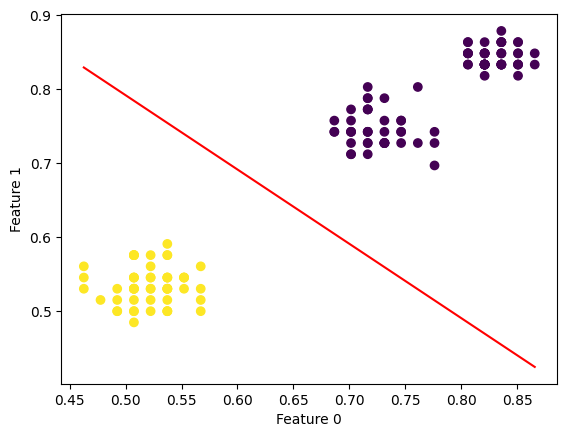

[[89  0]
 [ 0 53]]


In [165]:
per3 = Perceptron(n_iters=1000)

per3.fit(X_train3, y_train3)
perTrain3 = per3.predict(X_train3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per3.weights[0] / per3.weights[1]
intercept = -per3.bias / per3.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain3, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train3, perTrain3)
print(distinctions)


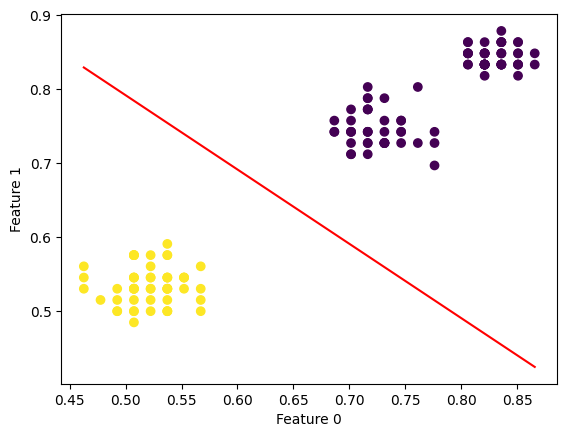

[[111   0]
 [  0  47]]


In [166]:
perTest3 = per3.predict(X_test3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per3.weights[0] / per3.weights[1]
intercept = -per3.bias / per3.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain3, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test3, perTest3)
print(distinctions)

#Убираем 3й класс из обучающей выборки

In [167]:
#Убираем 3 класс из обучающей выборки
indices_to_remove = np.where((y_train == 0) | (y_train == 1))
X_train4 = np.delete(X_train, indices_to_remove, axis=0)
y_train4 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train4))
print(len(X_train4))
print(y_train4)
for _ in range(len(y_train4)):
    if y_train3[_] == 2:
        y_train3[_] = 1
    else:
        y_train3[_] = 0

#убираем 2 класс из тестовой выборки
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test4 = np.delete(X_test, indices_to_remove, axis=0)
y_test4 = np.delete(y_test, indices_to_remove, axis=0)

print(len(y_train4))
print(len(X_train4))

for _ in range(len(y_test4)):
    if y_test4[_] == 2:
        y_test4[_] = 1
    else:
        y_test4[_] = 0
print(y_train4)

142
142
[2 2 2 4 2 4 3 2 3 2 4 4 4 4 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 2 4 2 4 4 2 3 2
 3 3 4 3 3 3 4 4 3 3 2 4 3 2 2 2 3 2 2 3 3 3 3 4 2 3 2 2 3 2 3 4 2 3 4 3 3
 4 2 2 2 2 4 2 2 2 4 4 3 2 4 3 4 3 2 2 3 2 3 3 2 4 3 4 2 3 4 3 4 3 4 4 2 4
 2 4 3 4 3 2 2 2 3 3 4 3 4 2 2 4 2 4 4 4 3 4 3 2 4 2 2 3 3 4 2]
142
142
[2 2 2 4 2 4 3 2 3 2 4 4 4 4 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 2 4 2 4 4 2 3 2
 3 3 4 3 3 3 4 4 3 3 2 4 3 2 2 2 3 2 2 3 3 3 3 4 2 3 2 2 3 2 3 4 2 3 4 3 3
 4 2 2 2 2 4 2 2 2 4 4 3 2 4 3 4 3 2 2 3 2 3 3 2 4 3 4 2 3 4 3 4 3 4 4 2 4
 2 4 3 4 3 2 2 2 3 3 4 3 4 2 2 4 2 4 4 4 3 4 3 2 4 2 2 3 3 4 2]


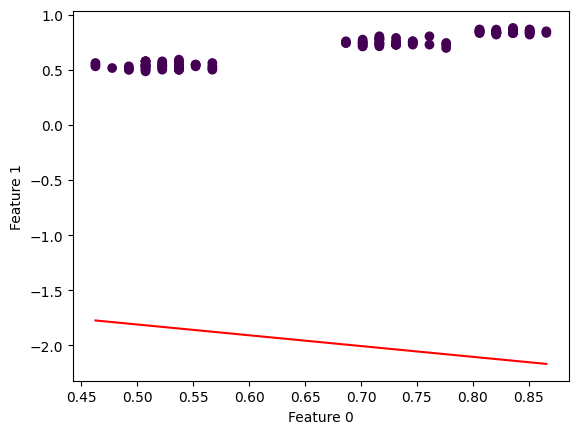

[[ 0  0  0  0]
 [53  0  0  0]
 [41  0  0  0]
 [48  0  0  0]]


In [168]:
per4 = Perceptron(n_iters=1000)

per4.fit(X_train4, y_train4)
perTrain4 = per4.predict(X_train4)

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])

x1_1 = np.amin(X_train4[:, 1])
x1_2 = np.amax(X_train4[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per4.weights[0] / per4.weights[1]
intercept = -per4.bias / per4.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=perTrain4, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train4, perTrain4)
print(distinctions)

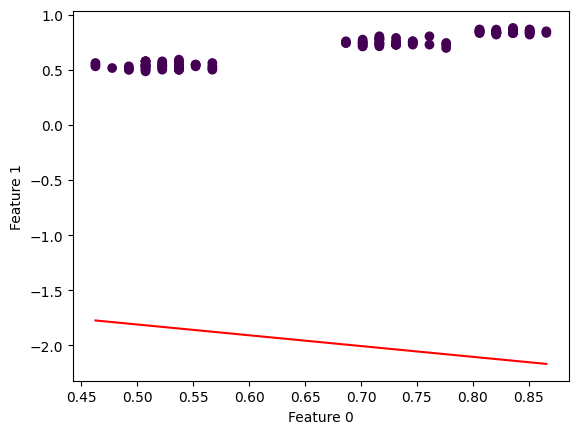

[[  0 111]
 [  0  47]]


In [169]:
perTest4 = per4.predict(X_test4)

x0_1 = np.amin(X_train4[:, 0])
x0_2 = np.amax(X_train4[:, 0])

x1_1 = np.amin(X_train4[:, 1])
x1_2 = np.amax(X_train4[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per4.weights[0] / per4.weights[1]
intercept = -per4.bias / per4.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=perTrain4, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_test4, perTest4)
print(distinctions)